In [239]:
# Exploring data

In [240]:
# Import stuff

import pandas as pd;
import webbrowser;
import sys;
import os;
import matplotlib.pyplot as plt;

sys.path.append("../Shared")

# noinspection PyUnresolvedReferences
import helpers;
print_line = helpers.print_line;
notebook_print = helpers.notebook_print;

In [241]:
# Read dataset into table using Pandas
data_table = pd.read_csv("../Datasets/ml_house_data_set_updated.csv");

notebook_print(data_table.head());

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2721596.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,212968.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,224529.0


In [242]:
# Describe the table
notebook_print(data_table.describe());

print_line(f"Number of rows: {len(data_table)}");

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,house_number,unit_number,zip_code,sale_price
count,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,3088.000000,42703.000000,4.270300e+04
mean,1990.993209,1.365759,3.209283,1.923659,0.527153,1987.758986,2127.155446,455.849800,41.656324,18211.767347,2027.395402,11030.991476,4.419862e+05
std,19.199987,0.513602,1.043396,0.759699,0.499268,846.766270,922.807342,243.453463,168.715867,27457.109993,1141.383770,573.576228,3.442857e+05
min,1852.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,5.000000,-4.000000,0.000000,0.000000,3.000000,10004.000000,6.640000e+02
25%,1980.000000,1.000000,3.000000,1.000000,0.000000,1380.000000,1466.000000,412.000000,0.000000,674.000000,1063.000000,10537.000000,2.855915e+05
50%,1994.000000,1.000000,3.000000,2.000000,1.000000,1808.000000,1937.000000,464.000000,0.000000,4530.000000,2033.000000,11071.000000,4.021910e+05
75%,2005.000000,2.000000,4.000000,2.000000,1.000000,2486.000000,2640.000000,606.000000,0.000000,24844.500000,2921.000000,11510.000000,5.327150e+05
max,2017.000000,4.000000,31.000000,8.000000,1.000000,12406.000000,15449.000000,8318.000000,9200.000000,99971.000000,3998.000000,11989.000000,2.293578e+07


Number of rows: 42703



In [243]:
# Describe categorical columns
notebook_print(data_table.describe(include="object"));

,garage_type,street_name,city
count,42703,42703,42703
unique,3,11124,47
top,attached,Matthew Points,Chadstad
freq,34079,128,4962


count - Number of non-missing entries for the given column.
Since we have 42703 entries for all columns, there are no missing categorical values in the dataset.

unique - Number of unique values in the given column.
According to the output, garage_type is the least diverse, street_name is the most diverse and cty is in the middle.

top - The most common value in the given column.
According to the output, the most common garage_type is attached, the most common street name is "Matthew Points" and the most common city is "Chadstad".

freq - The number of times the most common value appears in the given column.
So that means, "attached" appears 34079 times in the garage_type column, "Matthew Points" appears 128 times in the street_name column and "Chadstad" appears 4962 times in the cty column.

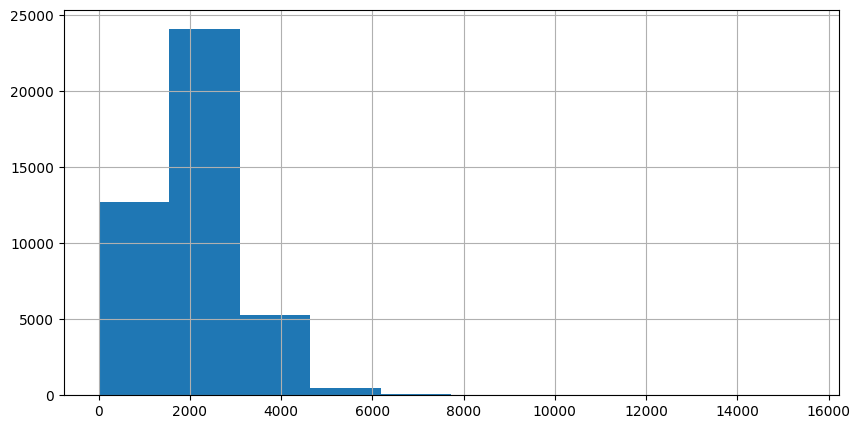

In [244]:
# Plot a histogram of the data
# See: https://www.w3schools.com/python/matplotlib_histograms.asp

# 5 labels on x-axis, 10 on y-axis
data_table["total_sqft"].hist(figsize=(10, 5));

So we can see that around 10_000 to 15_000 of the houses are in the range of 0 - 2000 sqft, around 20_000 to 25_000 of the houses are in the range of 2000 - 4000 sqft and so on.

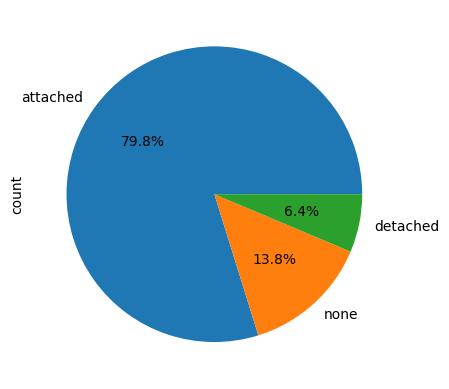

In [245]:
# Pie chart
# See: https://www.w3schools.com/python/matplotlib_pie_charts.asp

# "%1.1f%%" means that the percentage is displayed with 1 decimal place
data_table["garage_type"].value_counts().plot.pie(autopct="%1.1f%%");

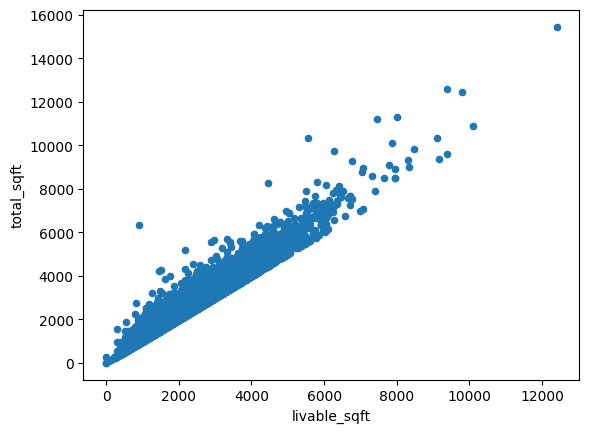

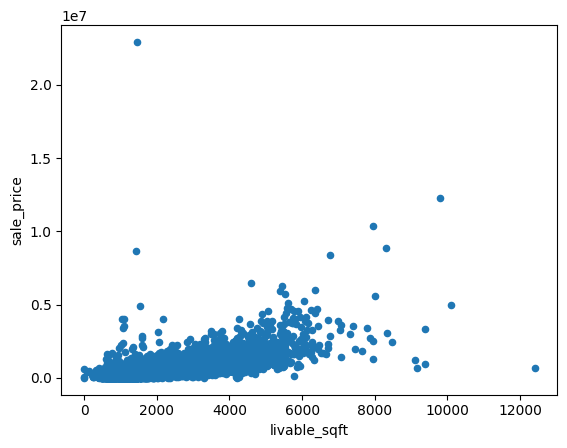

In [246]:
# Scatter plot
# See: https://www.w3schools.com/python/matplotlib_scatter.asp

# It might not make much sense to do data_table.plot twice ( Instead of hoisting to local ), but it enables PyCharm to be smarter. See: https://imgur.com/a/vP9Sl1V

data_table.plot.scatter(x="livable_sqft", y="total_sqft");

data_table.plot.scatter(x="livable_sqft", y="sale_price");

In [247]:
# Explore correlation between the different columns

livable_sqft_to_total_sqft_corr = data_table["livable_sqft"].corr(data_table["total_sqft"]);

print_line(f"Correlation between livable_sqft and total_sqft: {livable_sqft_to_total_sqft_corr}");

# Sort non-categorical columns by correlation to sale_price
notebook_print(data_table.corr(numeric_only=True)["sale_price"].sort_values(ascending=False));

Correlation between livable_sqft and total_sqft: 0.9754500463696794



sale_price             1.000000
total_sqft             0.655646
livable_sqft           0.622061
garage_sqft            0.447760
full_bathrooms         0.426326
has_pool               0.353980
num_bedrooms           0.312068
has_fireplace          0.273903
year_built             0.229282
has_central_cooling    0.141873
stories                0.125062
has_central_heating    0.115677
half_bathrooms         0.092857
unit_number            0.033718
house_number           0.001580
zip_code              -0.015889
carport_sqft          -0.195324
Name: sale_price, dtype: float64